<h2>Vamos comparar a Escola de Minas com o ICEB !!!<h3>

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np

#importando banco de dado sobre reprovados.
PRO = pd.read_excel('aprovacao_PRO.xlt')
PRO['CURSO'] = 'PRO'
GEO = pd.read_excel('aprovacao_GEO.xlt')
GEO['CURSO'] = 'GEO'
MEC = pd.read_excel('aprovacao_MEC.xlt')
MEC['CURSO'] = 'MEC'
ARQ = pd.read_excel('aprovacao_ARQ.xlt')
ARQ['CURSO'] = 'ARQ'
AMB = pd.read_excel('aprovacao_AMB.xlt')
AMB['CURSO'] = 'AMB'
CAT = pd.read_excel('aprovacao_CAT.xlt')
CAT['CURSO'] = 'CAT'
MET = pd.read_excel('aprovacao_MET.xlt')
MET['CURSO'] = 'MET'
CIV = pd.read_excel('aprovacao_CIV.xlt')
CIV['CURSO'] = 'CIV'
MIN = pd.read_excel('aprovacao_MIN.xlt')
MIN['CURSO'] = 'MIN'

Para unir os bancos de dados vamos limpar cada dataframe dadas suas particularidades.

In [2]:
#Excluir observação no dataframe:
PRO = PRO.drop([7055,7056])
#Nas disciplinas do básico não foi possivel separar o total de alunos de Eng de Produção.

#Padronizo o cabeçalho
ARQ = ARQ.rename(columns={"ANO.1": "SEMESTRE","ANO.2": "DISCIPLINA","ANO.3": "DESCRICAO","ANO.4": "DEPARTAMENTO","ANO.5": "TURMA","ANO.6": "APROVACOES","ANO.7": "MATRICULAS","ANO.8": "REPROVACOES FALTA"})

#Excluo colunas nulas.
AMB = AMB.drop(columns=['Unnamed: 12','Unnamed: 13','Unnamed: 14','Unnamed: 15'])
CAT = CAT.drop(columns=['COD PREDIO'])
ARQ = ARQ.drop(columns=['COD PREDIO'])

#Crio a coluna 'DEPARTAMENTO' para o dataframe PRO.
PRO['DEPARTAMENTO'] = PRO['DISCIPLINA']
PRO['DEPARTAMENTO'] = PRO['DEPARTAMENTO'].map(lambda x: str(x)[:-3])
PRO['DE'] = 'DE'
PRO['DEPARTAMENTO'] = PRO['DE'] + PRO['DEPARTAMENTO']
PRO = PRO.drop(columns=['DE'])
PRO['DEPARTAMENTO'] = PRO['DEPARTAMENTO'].str.replace('DEMTM','DEMAT')
PRO['DEPARTAMENTO'] = PRO['DEPARTAMENTO'].str.replace('DEBCC','DECOM')
PRO['DEPARTAMENTO'] = PRO['DEPARTAMENTO'].str.replace('DECIC','DECOM')

In [3]:
#Unindo todas os bancos de dados
Aprovacoes_EM = pd.concat([PRO,AMB,CAT,GEO,CIV,MIN,MET,MEC,ARQ], ignore_index=False)

In [4]:
#excluindo anos indesejados
Aprovacoes_EM['ANO'] = Aprovacoes_EM['ANO'].astype(int)
Aprovacoes_EM = Aprovacoes_EM.loc[(Aprovacoes_EM['ANO'] > 2003)]
Aprovacoes_EM = Aprovacoes_EM.loc[(Aprovacoes_EM['ANO'] != 2020)]

#Limpo a coluna 'SEMESTRE'
Aprovacoes_EM['SEMESTRE'] = (Aprovacoes_EM.SEMESTRE.astype(str).str.split('.', expand = True))

In [5]:
#Vamos criar uma nova coluna unindo as colunas Ano e Semestre
Aprovacoes_EM['ANO_SEMESTRE'] = Aprovacoes_EM.apply(lambda Aprovacoes_EM:'%s.%s' % (Aprovacoes_EM['ANO'],Aprovacoes_EM['SEMESTRE']),axis=1)
Aprovacoes_EM = Aprovacoes_EM.drop(columns=['ANO','SEMESTRE'])

In [6]:
#Organizando as colunas
Aprovacoes_EM = (Aprovacoes_EM[['ANO_SEMESTRE','CURSO','DEPARTAMENTO', 'DISCIPLINA', 'DESCRICAO', 'TURMA','APROVACOES', 'MATRICULAS', 'REPROVACOES FALTA', 'REPROVACOES NOTA','REPROVACOES NOTA FALTA', 'TRANCAMENTOS']]).reset_index()
Aprovacoes_EM = Aprovacoes_EM.drop(columns=['index'])

In [7]:
#Finalmente crio as colunas com a taxa de aprovacoes e reprovacoes
Aprovacoes_EM['Taxa_aprovação'] = round(Aprovacoes_EM['APROVACOES']/Aprovacoes_EM['MATRICULAS'],2)
Aprovacoes_EM['Reprovacao_nota'] = round(Aprovacoes_EM['REPROVACOES NOTA']/Aprovacoes_EM['MATRICULAS'],2)
Aprovacoes_EM['Reprovacao_falta'] = round(Aprovacoes_EM['REPROVACOES NOTA FALTA']/Aprovacoes_EM['MATRICULAS'],2)

In [8]:
Aprovacoes_EM.tail()

,ANO_SEMESTRE,CURSO,DEPARTAMENTO,DISCIPLINA,DESCRICAO,TURMA,APROVACOES,MATRICULAS,REPROVACOES FALTA,REPROVACOES NOTA,REPROVACOES NOTA FALTA,TRANCAMENTOS,Taxa_aprovação,Reprovacao_nota,Reprovacao_falta
57937,2019.2,ARQ,DEMAT,MTM500,FUNDAMENTOS DE CALCULO,32.0,27.0,55.0,1.0,18.0,9.0,0.0,0.49,0.33,0.16
57938,2019.2,ARQ,DEMAT,MTM500,FUNDAMENTOS DE CALCULO,33.0,32.0,49.0,0.0,8.0,8.0,1.0,0.65,0.16,0.16
57939,2019.2,ARQ,DEPRO,PRO562,EFICIENCIA E CONSERVACAO DE ENERGIA,11.0,30.0,34.0,0.0,0.0,0.0,4.0,0.88,0.00,0.00
57940,2019.2,ARQ,DEPRO,PRO562,EFICIENCIA E CONSERVACAO DE ENERGIA,12.0,1.0,1.0,0.0,0.0,0.0,0.0,1.00,0.00,0.00
57941,2019.2,ARQ,DEURB,URB416,GEOTECNIA APLICADA A ARQUITETURA E AO URBANISMO,11.0,29.0,30.0,0.0,0.0,0.0,1.0,0.97,0.00,0.00


In [9]:
(pd.DataFrame(Aprovacoes_EM.groupby('CURSO').Taxa_aprovação.mean())).reset_index()


,CURSO,Taxa_aprovação
0,AMB,0.683462
1,ARQ,0.799556
2,CAT,0.695049
3,CIV,0.683188
4,GEO,0.703639
5,MEC,0.667554
6,MET,0.698366
7,MIN,0.699649
8,PRO,0.685229


In [10]:
Aprovacoes_EM[['Taxa_aprovação','CURSO']].groupby('CURSO').boxplot(fontsize=12, figsize=(8,10))
#pegar o desvio padráo e dividir pela raiz quadrada do tamanho do n (erro padrao)

AMB         AxesSubplot(0.1,0.679412;0.235294x0.220588)
ARQ    AxesSubplot(0.382353,0.679412;0.235294x0.220588)
CAT    AxesSubplot(0.664706,0.679412;0.235294x0.220588)
CIV         AxesSubplot(0.1,0.414706;0.235294x0.220588)
GEO    AxesSubplot(0.382353,0.414706;0.235294x0.220588)
MEC    AxesSubplot(0.664706,0.414706;0.235294x0.220588)
MET             AxesSubplot(0.1,0.15;0.235294x0.220588)
MIN        AxesSubplot(0.382353,0.15;0.235294x0.220588)
PRO        AxesSubplot(0.664706,0.15;0.235294x0.220588)
dtype: object

Acima vemos a primera ideia do que queremos. Apesar de mostrar qual curso é mais dificil aqui misturamos matérias obrigatórias e eletivas em diferentes departamentos e épocas. 

Vamos identificar quais matérias são da EM ou do ICEB, quais são obrigatórias, eletivas ou deixaram de ser ofertadas.

<h3>Precisamos identificar a Escola de cada matéria.<h3>

In [11]:
#Crio o banco de dado com os departamentos da EM e do ICEB
ICEB = pd.DataFrame({'ESCOLA':'ICEB','DEPARTAMENTO': ['DEFIS','DEMAT','DEQUI','DECOM','DEEST','DEBIO','DECBI']})
EM = pd.DataFrame({'ESCOLA':'ESCOLA DE MINAS', 'DEPARTAMENTO' : ['DECAT','DEMET','DEPRO','DEARQ','DECIV','DEGEO','DEMIN','DEAMB','DEMEC','DEURB']})

In [12]:
#Vamos unir os três bancos de dados
Aprovacoes_EM = Aprovacoes_EM.merge(EM,on='DEPARTAMENTO',how = 'outer').merge(ICEB,on='DEPARTAMENTO',how = 'outer')

#Gambiarras da brabas, náo repitam isso em casa!!!!
Aprovacoes_EM['ESCOLA_x'] = Aprovacoes_EM['ESCOLA_x'].fillna('')
Aprovacoes_EM['ESCOLA_y'] = Aprovacoes_EM['ESCOLA_y'].fillna('')
Aprovacoes_EM['ESCOLA'] = Aprovacoes_EM['ESCOLA_x'] + Aprovacoes_EM['ESCOLA_y']
Aprovacoes_EM['ESCOLA'] = Aprovacoes_EM['ESCOLA'].fillna('')

Aprovacoes_EM['ESCOLA'] = Aprovacoes_EM['ESCOLA'].replace({'': 'OUTRAS'})
Aprovacoes_EM = Aprovacoes_EM.drop(columns=['ESCOLA_x','ESCOLA_y'])

Devo ler todas as matrizes curriculares e descobrir quais são voluntárias e obrigatórias!!

Desafio muito interessante! Vamos trabalhar!!

Limpeza de todos os bancos de dados da Matriz Curricular.

In [13]:
#Excluo valores nulos, renomeio colunas, excluo colunas nulas e incorretas, adiciono um indicador para cada curso.
Grade_MEC = pd.read_excel('matrizMEC.xlsx')
Grade_MEC = (Grade_MEC.dropna()).reset_index().drop(columns = 'index')
Grade_MEC['CURSO'] = 'MEC'

Grade_CIV = pd.read_excel('matrizCIV.xlsx')
Grade_CIV = (Grade_CIV.dropna()).reset_index().drop(columns = 'index')
Grade_CIV['CURSO'] = 'CIV'

Grade_MET = pd.read_excel('matrizMET.xlsx')
Grade_MET = Grade_MET.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4','Unnamed: 5','Unnamed: 6','Unnamed: 7','Unnamed: 8','Unnamed: 9','Unnamed: 10'])
Grade_MET.columns = ["CÓDIGO", "DISCIPLINAS OBRIGATÓRIAS"]
Grade_MET = Grade_MET.drop([0])
Grade_MET = (Grade_MET.dropna()).reset_index().drop(columns = 'index')
Grade_MET['CURSO'] = 'MET'

Grade_PRO = pd.read_excel('matrizPRO.xlsx')
Grade_PRO = Grade_PRO.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4','Unnamed: 5','Unnamed: 6','Unnamed: 7','Unnamed: 8'])
Grade_PRO.columns = ["CÓDIGO", "DISCIPLINAS OBRIGATÓRIAS"]
Grade_PRO = Grade_PRO.drop([0])
Grade_PRO = (Grade_PRO.dropna()).reset_index().drop(columns = 'index')
Grade_PRO['CURSO'] = 'PRO'


Grade_MIN = pd.read_excel('matrizMIN.xlsx')
Grade_MIN = Grade_MIN.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4','Unnamed: 5','Unnamed: 6','Unnamed: 7','Unnamed: 8','Unnamed: 9'])
Grade_MIN = (Grade_MIN.dropna()).reset_index().drop(columns = 'index')
Grade_MIN['CURSO'] = 'MIN'

Grade_GEO = pd.read_excel('matrizGEO.xlsx')
Grade_GEO = (Grade_GEO.dropna()).reset_index().drop(columns = 'index')
Grade_GEO['CURSO'] = 'GEO'

Grade_AUT = pd.read_excel('matrizAUT.xlsx')
Grade_AUT = Grade_AUT.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4','Unnamed: 5','Unnamed: 6','Unnamed: 7','Unnamed: 8'])
Grade_AUT.columns = ["CÓDIGO", "DISCIPLINAS OBRIGATÓRIAS"]
Grade_AUT = Grade_AUT.drop([0])
Grade_AUT = (Grade_AUT.dropna()).reset_index().drop(columns = 'index')
Grade_AUT['CURSO'] = 'AUT'

Grade_AMB = pd.read_excel('matrizAMB.xlsx')
Grade_AMB = Grade_AMB.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4','Unnamed: 5','Unnamed: 6','Unnamed: 7'])
Grade_AMB = (Grade_AMB.dropna()).reset_index().drop(columns = 'index')
Grade_AMB['CURSO'] = 'AMB'

#Problema em identificar matérias eletivas
Grade_ARQ = pd.read_excel('matrizARQ.xlsx')
Grade_ARQ = Grade_ARQ.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4','Unnamed: 5','Unnamed: 6','Unnamed: 7','Unnamed: 8','Unnamed: 9','Unnamed: 10'])
Grade_ARQ.columns = ["CÓDIGO", "DISCIPLINAS OBRIGATÓRIAS"]
Grade_ARQ = Grade_ARQ.drop([0])
Grade_ARQ = (Grade_ARQ.dropna()).reset_index().drop(columns = 'index')
Grade_ARQ['CURSO'] = 'ARQ'

In [14]:
#Neste banco de dado sobre a grade curricular, as matérias obrigatórias são separadas das eletivas por uma string chamada "CÓDIGO"

#ENGENHARIA GEOLOGICA
m = Grade_GEO['CÓDIGO'].unique()
local_codigo_GEO = np.where(m == "CÓDIGO")[0][0]
obrigatorias_GEO = pd.DataFrame(m[0:local_codigo_GEO])
obrigatorias_GEO['VINCULO'] = 'OBRIGATORIA'

eletivas_GEO = pd.DataFrame(m[local_codigo_GEO:len(m)])
eletivas_GEO.drop(eletivas_GEO.head(1).index, inplace=True)
eletivas_GEO['VINCULO'] = 'ELETIVA'

Vinculo_GEO = pd.concat([eletivas_GEO,obrigatorias_GEO], ignore_index=False)
Vinculo_GEO = Vinculo_GEO.rename(columns={0: "DISCIPLINA"})
Vinculo_GEO['CURSO'] = 'GEO'

#ENGENHARIA DE PRODUCAO
m = Grade_PRO['CÓDIGO'].unique()
local_codigo_PRO = np.where(m == "ELETIVAS")[0][0]
obrigatorias_PRO = pd.DataFrame(m[0:local_codigo_PRO])
obrigatorias_PRO['VINCULO'] = 'OBRIGATORIA'

eletivas_PRO = pd.DataFrame(m[local_codigo_PRO:len(m)])
eletivas_PRO.drop(eletivas_PRO.head(1).index, inplace=True)
eletivas_PRO['VINCULO'] = 'ELETIVA'

Vinculo_PRO = pd.concat([eletivas_PRO,obrigatorias_PRO], ignore_index=False)
Vinculo_PRO = Vinculo_PRO.rename(columns={0: "DISCIPLINA"})
Vinculo_PRO['CURSO'] = 'PRO'

#ENGENHARIA DE MINAS
m = Grade_MIN['CÓDIGO'].unique()
local_codigo_MIN = np.where(m == "CÓDIGO")[0][0]
obrigatorias_MIN = pd.DataFrame(m[0:local_codigo_MIN])
obrigatorias_MIN['VINCULO'] = 'OBRIGATORIA'

eletivas_MIN = pd.DataFrame(m[local_codigo_MIN:len(m)])
eletivas_MIN.drop(eletivas_MIN.head(1).index, inplace=True)
eletivas_MIN['VINCULO'] = 'ELETIVA'

Vinculo_MIN = pd.concat([eletivas_MIN,obrigatorias_MIN], ignore_index=False)
Vinculo_MIN = Vinculo_MIN.rename(columns={0: "DISCIPLINA"})
Vinculo_MIN['CURSO'] = 'MIN'

#ENGENHARIA AMBIENTAL
m = Grade_AMB['CÓDIGO'].unique()
local_codigo_AMB = np.where(m == "CÓDIGO")[0][0]
obrigatorias_AMB = pd.DataFrame(m[0:local_codigo_AMB])
obrigatorias_AMB['VINCULO'] = 'OBRIGATORIA'

eletivas_AMB = pd.DataFrame(m[local_codigo_AMB:len(m)])
eletivas_AMB.drop(eletivas_AMB.head(1).index, inplace=True)
eletivas_AMB['VINCULO'] = 'ELETIVA'

Vinculo_AMB = pd.concat([eletivas_AMB,obrigatorias_AMB], ignore_index=False)
Vinculo_AMB = Vinculo_AMB.rename(columns={0: "DISCIPLINA"})
Vinculo_AMB['CURSO'] = 'AMB'

#ENGENHARIA METALURGICA
m = Grade_MET['CÓDIGO'].unique()
local_codigo_MET = np.where(m == "CÓDIGO")[0][0]
obrigatorias_MET = pd.DataFrame(m[0:local_codigo_MET])
obrigatorias_MET['VINCULO'] = 'OBRIGATORIA'

eletivas_MET = pd.DataFrame(m[local_codigo_MET:len(m)])
eletivas_MET.drop(eletivas_MET.head(1).index, inplace=True)
eletivas_MET['VINCULO'] = 'ELETIVA'

Vinculo_MET = pd.concat([eletivas_MET,obrigatorias_MET], ignore_index=False)
Vinculo_MET = Vinculo_MET.rename(columns={0: "DISCIPLINA"})
Vinculo_MET['CURSO'] = 'MET'

#ENGENHARIA MECANINCA
m = Grade_MEC['CÓDIGO'].unique()
local_codigo_MEC = np.where(m == "CÓDIGO")[0][0]
obrigatorias_MEC = pd.DataFrame(m[0:local_codigo_MEC])
obrigatorias_MEC['VINCULO'] = 'OBRIGATORIA'

eletivas_MEC = pd.DataFrame(m[local_codigo_MEC:len(m)])
eletivas_MEC.drop(eletivas_MEC.head(1).index, inplace=True)
eletivas_MEC['VINCULO'] = 'ELETIVA'

Vinculo_MEC = pd.concat([eletivas_MEC,obrigatorias_MEC], ignore_index=False)
Vinculo_MEC = Vinculo_MEC.rename(columns={0: "DISCIPLINA"})
Vinculo_MEC['CURSO'] = 'MEC'

#ARQUITETURA
m = Grade_ARQ['CÓDIGO'].unique()
local_codigo_ARQ = np.where(m == "CÓDIGO")[0][0]
obrigatorias_ARQ = pd.DataFrame(m[0:local_codigo_ARQ])
obrigatorias_ARQ['VINCULO'] = 'OBRIGATORIA'

eletivas_ARQ = pd.DataFrame(m[local_codigo_ARQ:len(m)])
eletivas_ARQ.drop(eletivas_ARQ.head(1).index, inplace=True)
eletivas_ARQ['VINCULO'] = 'ELETIVA'

Vinculo_ARQ = pd.concat([eletivas_ARQ,obrigatorias_ARQ], ignore_index=False)
Vinculo_ARQ = Vinculo_ARQ.rename(columns={0: "DISCIPLINA"})
Vinculo_ARQ['CURSO'] = 'ARQ'

#ENGENHARIA CIVIL
m = Grade_CIV['CÓDIGO'].unique()
local_codigo_CIV = np.where(m == "CÓDIGO")[0][0]
obrigatorias_CIV = pd.DataFrame(m[0:local_codigo_CIV])
obrigatorias_CIV['VINCULO'] = 'OBRIGATORIA'

eletivas_CIV = pd.DataFrame(m[local_codigo_CIV:len(m)])
eletivas_CIV.drop(eletivas_CIV.head(1).index, inplace=True)
eletivas_CIV['VINCULO'] = 'ELETIVA'

Vinculo_CIV = pd.concat([eletivas_CIV,obrigatorias_CIV], ignore_index=False)
Vinculo_CIV = Vinculo_CIV.rename(columns={0: "DISCIPLINA"})
Vinculo_CIV['CURSO'] = 'CIV'

#ENGENHARIA DE CONTROLE E AUTOMAÇÃO
m = Grade_AUT['CÓDIGO'].unique()
local_codigo_AUT = np.where(m == "CODIGO")[0][0]
obrigatorias_AUT = pd.DataFrame(m[0:local_codigo_AUT])
obrigatorias_AUT['VINCULO'] = 'OBRIGATORIA'

eletivas_AUT = pd.DataFrame(m[local_codigo_AUT:len(m)])
eletivas_AUT.drop(eletivas_AUT.head(1).index, inplace=True)
eletivas_AUT['VINCULO'] = 'ELETIVA'

Vinculo_AUT = pd.concat([eletivas_AUT,obrigatorias_AUT], ignore_index=False)
Vinculo_AUT = Vinculo_AUT.rename(columns={0: "DISCIPLINA"})
Vinculo_AUT['CURSO'] = 'CAT'

Vinculo = pd.concat([Vinculo_AUT,Vinculo_AMB,Vinculo_MIN,Vinculo_MET,Vinculo_MEC,Vinculo_PRO,Vinculo_GEO,Vinculo_CIV,Vinculo_ARQ], ignore_index=False)

In [15]:
Aprovacoes_EM = Aprovacoes_EM.merge(Vinculo,on=['DISCIPLINA','CURSO'],how = 'left')
Aprovacoes_EM['VINCULO'] = Aprovacoes_EM['VINCULO'].replace(np.nan, 'EXTINTA', regex=True)
Aprovacoes_EM['Taxa_aprovação'] = Aprovacoes_EM['Taxa_aprovação'].fillna(0)

In [16]:
Disciplinas_zeradas = (pd.DataFrame(Aprovacoes_EM[['Taxa_aprovação','DISCIPLINA','CURSO']].loc[(Aprovacoes_EM['Taxa_aprovação'] == 0)]))
#Disciplinas_zeradas['DISCIPLINA'].unique()

In [17]:
#Vamos criar filtros para analisar estatisticamente cada atributo.

In [43]:
Obrigatorias = Aprovacoes_EM.loc[(Aprovacoes_EM['VINCULO'] == 'ELETIVA')]
Obrigatorias_EM = Obrigatorias.loc[(Obrigatorias['ESCOLA'] == 'ICEB')] 

In [44]:
Selecao_PRO = Obrigatorias_EM.loc[(Obrigatorias_EM['CURSO'] == 'PRO')]
Selecao_PRO = Selecao_PRO[['Taxa_aprovação','CURSO']]

Selecao_MIN = Obrigatorias_EM.loc[(Obrigatorias_EM['CURSO'] == 'MIN')]
Selecao_MIN = Selecao_MIN[['Taxa_aprovação','CURSO']]

Selecao_MET = Obrigatorias_EM.loc[(Obrigatorias_EM['CURSO'] == 'MET')]
Selecao_MET = Selecao_MET[['Taxa_aprovação','CURSO']]

Selecao_CAT = Obrigatorias_EM.loc[(Obrigatorias_EM['CURSO'] == 'CAT')]
Selecao_CAT = Selecao_CAT[['Taxa_aprovação','CURSO']]

Selecao_ARQ = Obrigatorias_EM.loc[(Obrigatorias_EM['CURSO'] == 'ARQ')]
Selecao_ARQ = Selecao_ARQ[['Taxa_aprovação','CURSO']]

Selecao_CIV = Obrigatorias_EM.loc[(Obrigatorias_EM['CURSO'] == 'CIV')]
Selecao_CIV = Selecao_CIV[['Taxa_aprovação','CURSO']]

Selecao_MEC = Obrigatorias_EM.loc[(Obrigatorias_EM['CURSO'] == 'MEC')]
Selecao_MEC = Selecao_MEC[['Taxa_aprovação','CURSO']]

Selecao_AMB = Obrigatorias_EM.loc[(Obrigatorias_EM['CURSO'] == 'AMB')]
Selecao_AMB = Selecao_AMB[['Taxa_aprovação','CURSO']]

Selecao_GEO = Obrigatorias_EM.loc[(Obrigatorias_EM['CURSO'] == 'GEO')]
Selecao_GEO = Selecao_GEO[['Taxa_aprovação','CURSO']]

C:\Users\James Bond\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


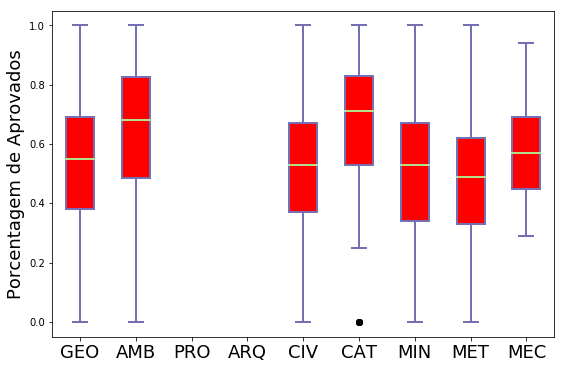

In [45]:
data_to_plot = [Selecao_GEO['Taxa_aprovação'], Selecao_AMB['Taxa_aprovação'], Selecao_PRO['Taxa_aprovação'], Selecao_ARQ['Taxa_aprovação'], Selecao_CIV['Taxa_aprovação'], Selecao_CAT['Taxa_aprovação'], Selecao_MIN['Taxa_aprovação'], Selecao_MET['Taxa_aprovação'], Selecao_MEC['Taxa_aprovação']]

import matplotlib.pyplot as plt 

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_to_plot, patch_artist=True)

## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#FF0000' )
    
## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)
    
## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)
    
## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)
    
## Custom x-axis labels
ax.set_xticklabels(["GEO","AMB","PRO","ARQ","CIV","CAT","MIN","MET",'MEC'],size = 18)

#config of labels ans title
ax.set_ylabel('Porcentagem de Aprovados',size = 18)

# Save the figure
fig.savefig('fig1.png', bbox_inches='tight')

In [56]:
Aprovacoes_EM.to_csv('Desempenho_acadêmico_EM.csv')

GEO    AxesSubplot(0.1,0.15;0.8x0.75)
dtype: object

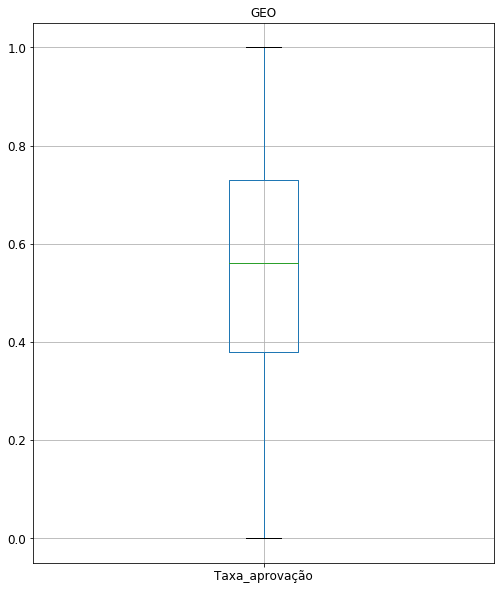

In [22]:
import matplotlib.pyplot as plt

green_diamond = dict(markerfacecolor='R', marker='s')
Selecao_GEO.groupby('CURSO').boxplot(fontsize=12, figsize=(8,10), flierprops=green_diamond)

AMB         AxesSubplot(0.1,0.679412;0.235294x0.220588)
ARQ    AxesSubplot(0.382353,0.679412;0.235294x0.220588)
CAT    AxesSubplot(0.664706,0.679412;0.235294x0.220588)
CIV         AxesSubplot(0.1,0.414706;0.235294x0.220588)
GEO    AxesSubplot(0.382353,0.414706;0.235294x0.220588)
MEC    AxesSubplot(0.664706,0.414706;0.235294x0.220588)
MET             AxesSubplot(0.1,0.15;0.235294x0.220588)
MIN        AxesSubplot(0.382353,0.15;0.235294x0.220588)
PRO        AxesSubplot(0.664706,0.15;0.235294x0.220588)
dtype: object

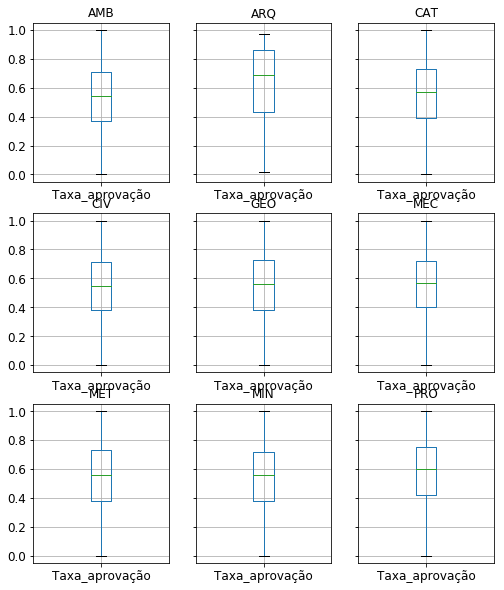

In [23]:
import matplotlib.pyplot as plt

green_diamond = dict(markerfacecolor='R', marker='s')
Obrigatorias_EM[['Taxa_aprovação','CURSO']].groupby('CURSO').boxplot(fontsize=12, figsize=(8,10), flierprops=green_diamond)

In [24]:
pd.DataFrame(Obrigatorias_EM[['Taxa_aprovação','CURSO']].groupby('CURSO').mean())

,Taxa_aprovação
CURSO,
AMB,0.536008
ARQ,0.625227
CAT,0.558343
CIV,0.543992
GEO,0.553088
MEC,0.557766
MET,0.552486
MIN,0.548937
PRO,0.583542


In [25]:
#Aprovacoes_EM[['Taxa_aprovação','CURSO']].groupby('CURSO').boxplot(rot=45, fontsize=12, figsize=(8,10))